# Laboratory of Computational Physics mod. B
# Title????
Authors:
Valeria Fioroni, 
Matteo Guida,
Philipp Zehetner

In [1]:
import pandas as pd
import os
from root_pandas import read_root
import tensorflow as tf
import seaborn as sns
import numpy as np

Welcome to JupyROOT 6.16/00


# Read Data

In [2]:
#Read background and signal samples from ROOT files
#BACKGROUND
'''CONTINUUM BACKGROUND'''
Continuum_bkg = pd.DataFrame() #empty dataframe to contain continuum bkg samples
#export all continuum bkg root files to a single pandas dataframe
for file in os.listdir("../DataBelle2/Background/Continuum/"):
    continuum_temp = pd.DataFrame()
    continuum_temp = read_root("../DataBelle2/Background/Continuum/" + file, 'B0')
    frames=[Continuum_bkg, continuum_temp]
    Continuum_bkg= pd.concat(frames, ignore_index=True)
    
    
'''PEAKING BACKGROUND'''
Peaking_bkg = pd.DataFrame() #empty dataframe to contain peaked bkg samples
#export all peaking bkg root files to a single pandas dataframe
for file in os.listdir("../DataBelle2/Background/Peaking/"):
    peaking_temp = pd.DataFrame()
    peaking_temp = read_root("../DataBelle2/Background/Peaking/" + file, 'B0')
    frames=[Peaking_bkg, peaking_temp]
    Peaking_bkg= pd.concat(frames, ignore_index=True)

#SIGNAL
'''SIGNAL'''
Signal = pd.DataFrame() #empty dataframe to contain signal samples
#export all peaking bkg root files to a single pandas dataframe
for file in os.listdir("../DataBelle2/Signal/"):
    signal_temp = pd.DataFrame()
    signal_temp = read_root("../DataBelle2/Signal/" + file, 'B0')
    frames=[Signal, signal_temp]
    Signal= pd.concat(frames, ignore_index=True) 
       

#Signal: require B0_isSignal == True
Signal=Signal[Signal['B0_isSignal']== True]
#reset row indexing
Signal.reset_index(drop=True, inplace=True)
print(Signal.shape)

#Continuum: require B0_isContinuumEvent == True
Continuum_bkg=Continuum_bkg[Continuum_bkg['B0_isContinuumEvent']== True]
#reset row indexing
Continuum_bkg.reset_index(drop=True, inplace=True)
print(Continuum_bkg.shape)

#Peaking: require B0_isNotContinuumEvent == True
Peaking_bkg=Peaking_bkg[Peaking_bkg['B0_isNotContinuumEvent']== True]
#reset row indexing
Peaking_bkg.reset_index(drop=True, inplace=True)
print(Peaking_bkg.shape)

def memory(df):
    print(str((round(df.memory_usage(deep=True).sum() / 1024 ** 2, 2))),"Mb")
    
memory(Signal)
memory(Continuum_bkg)
memory(Peaking_bkg)

/home/utente/.local/lib/python3.6/site-packages/root_pandas/readwrite.py:320: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


(20491, 391)
(1847, 391)
(208, 391)
106.7 Mb
9.62 Mb
1.08 Mb


# Useful lists of variables

In [3]:
General = ['exp_no', 'run_no', 'evt_no', 'nCands', 'iCand']
Masses = ['B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 
          'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM']
Kinetics = ['B0_P', 'B0_P4', 'B0_deltae', 'B0_mbc', 'B0_etap_P', 'B0_etap_P4', 
            'B0_etap_eta_P', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P4',
            'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P4', 'B0_etap_pi0_P', 'B0_etap_pi0_P4',
            'B0_etap_pi1_P', 'B0_etap_pi1_P4', 'B0_K_S0_P', 'B0_K_S0_P4']
Kinetics_comp = ['B0_P', 'B0_P40', 'B0_P41', 'B0_P42', 'B0_P43', 'B0_deltae', 'B0_mbc',
                 'B0_etap_P', 'B0_etap_P40', 'B0_etap_P41', 'B0_etap_P42','B0_etap_P43','B0_etap_eta_P',
                 'B0_etap_eta_P40', 'B0_etap_eta_P41', 'B0_etap_eta_P42', 'B0_etap_eta_P43',
                 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P40', 'B0_etap_eta_gamma0_P41', 
                 'B0_etap_eta_gamma0_P42', 'B0_etap_eta_gamma0_P43', 'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P40',
                 'B0_etap_eta_gamma1_P41', 'B0_etap_eta_gamma1_P42', 'B0_etap_eta_gamma1_P43', 'B0_etap_pi0_P',
                 'B0_etap_pi0_P40', 'B0_etap_pi0_P41', 'B0_etap_pi0_P42', 'B0_etap_pi0_P43', 'B0_etap_pi1_P',
                 'B0_etap_pi1_P40', 'B0_etap_pi1_P41', 'B0_etap_pi1_P42', 'B0_etap_pi1_P43', 'B0_K_S0_P',
                 'B0_K_S0_P40', 'B0_K_S0_P41', 'B0_K_S0_P42', 'B0_K_S0_P43']
FourMomenta = ['B0_P4', 'B0_etap_P4', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P4', 'B0_etap_eta_gamma1_P4', 
            'B0_etap_pi0_P4', 'B0_etap_pi1_P4', 'B0_K_S0_P4']
DecayAngles = ['B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc',
               'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc']
Positions = ['B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho',  
             'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 
             'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho',
             'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y',
             'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho',
             'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 
             'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 
             'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 
             'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 
             'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z',
             'B0_K_S0_ErrZ', 'B0_K_S0_Rho', 
             'B0_cosAngleBetweenMomentumAndVertexVector', 'B0_distance', 'B0_significanceOfDistance',
             'B0_dr', 'B0_etap_pi0_dr', 'B0_etap_pi1_dr', 'B0_K_S0_dr']
Vertex = ['B0_VtxPvalue', 'B0_VtxProd', 'B0_VtxProdCov', 'B0_etap_VtxPvalue', 'B0_etap_VtxProd', 'B0_etap_VtxProdCov',
          'B0_etap_eta_VtxPvalue', 'B0_etap_eta_VtxProd', 'B0_etap_VtxProdCov', 
          'B0_etap_pi0_VtxPvalue', 'B0_etap_pi0_VtxProd', 'B0_etap_pi0_VtxProdCov', 
          'B0_etap_pi1_VtxPvalue', 'B0_etap_pi1_VtxProd', 'B0_etap_pi1_VtxProdCov', 
          'B0_K_S0_VtxPvalue', 'B0_K_S0_VtxProd', 'B0_K_S0_VtxProdCov']

Vertex_train = ['B0_VtxPvalue', 'B0_etap_VtxPvalue','B0_etap_eta_VtxPvalue', 'B0_etap_pi0_VtxPvalue', 
                'B0_etap_pi1_VtxPvalue', 'B0_K_S0_VtxPvalue']
Continuum_Supression = ['B0_CSMVA', 'B0_TrCSMVA']


Important_variables= Masses + Kinetics + DecayAngles + Positions + Vertex_train + Continuum_Supression
print(Important_variables)


['B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM', 'B0_P', 'B0_P4', 'B0_deltae', 'B0_mbc', 'B0_etap_P', 'B0_etap_P4', 'B0_etap_eta_P', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P4', 'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P4', 'B0_etap_pi0_P', 'B0_etap_pi0_P4', 'B0_etap_pi1_P', 'B0_etap_pi1_P4', 'B0_K_S0_P', 'B0_K_S0_P4', 'B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc', 'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc', 'B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho', 'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho', 'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y', 'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho', 'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 'B0_eta

# Preselection

In [4]:
#Masses from PDG
M_B0 = [5.27955, 0.00026]
M_K0 = [0.497611, 0.000013]
M_etap = [0.95778, 0.00006]
M_eta = [0.547862, 0.000017]

#Require the B0 mass to be within 5 sigma from PDG value
Signal = Signal[abs(Signal['B0_M'] - M_B0[0]) < 5 * Signal['B0_ErrM']]
print(Signal.shape)

#In case of more than 1 candidate per event select the first one occuring
Mask_duplicated = Signal.duplicated(subset='evt_no', keep='first')
Mask_duplicated=np.logical_not(Mask_duplicated)
Signal=Signal[Mask_duplicated]
Signal.reset_index(drop=True, inplace=True)

print(Signal.shape)
print(Signal['evt_no'].nunique())

(19938, 391)
(19825, 391)
19825


In [5]:
#Select variables useful for the Classification task
Signal_sel = Signal[Important_variables]
del(Signal)
Continuum_bkg_sel= Continuum_bkg[Important_variables]
del(Continuum_bkg)
Peaking_bkg_sel= Peaking_bkg[Important_variables]
del(Peaking_bkg)

print(Continuum_bkg_sel.shape)
print(Peaking_bkg_sel.shape)
print(Signal_sel.shape)

#The Dataframe contains arrays as elements, I create a new column for each component
for M in FourMomenta: 
    Signal_sel[M+'0'], Signal_sel[M+'1'], Signal_sel[M+'2'], Signal_sel[M+'3'] = zip(*Signal_sel.pop(M))
    Continuum_bkg_sel[M+'0'], Continuum_bkg_sel[M+'1'], Continuum_bkg_sel[M+'2'], Continuum_bkg_sel[M+'3'] = zip(*Continuum_bkg_sel.pop(M))
    Peaking_bkg_sel[M+'0'], Peaking_bkg_sel[M+'1'], Peaking_bkg_sel[M+'2'], Peaking_bkg_sel[M+'3'] = zip(*Peaking_bkg_sel.pop(M))

#Signal_sel[['B0_P40', 'B0_P41', 'B0_P42', 'B0_P43']]    

(1847, 92)
(208, 92)
(19825, 92)


In [6]:
from IPython.display import display
pd.options.display.max_columns = None
display(Signal_sel)

,B0_M,B0_ErrM,B0_SigM,B0_K_S0_M,B0_K_S0_ErrM,B0_K_S0_SigM,B0_etap_M,B0_etap_ErrM,B0_etap_SigM,B0_etap_eta_M,B0_etap_eta_ErrM,B0_etap_eta_SigM,B0_P,B0_deltae,B0_mbc,B0_etap_P,B0_etap_eta_P,B0_etap_eta_gamma0_P,B0_etap_eta_gamma1_P,B0_etap_pi0_P,B0_etap_pi1_P,B0_K_S0_P,B0_decayAngle__bo0__bc,B0_decayAngle__bo1__bc,B0_etap_decayAngle__bo0__bc,B0_etap_decayAngle__bo1__bc,B0_etap_decayAngle__bo2__bc,B0_X,B0_ErrX,B0_Y,B0_ErrY,B0_Z,B0_ErrZ,B0_Rho,B0_etap_X,B0_etap_ErrX,B0_etap_Y,B0_etap_ErrY,B0_etap_Z,B0_etap_ErrZ,B0_etap_Rho,B0_etap_eta_X,B0_etap_eta_ErrX,B0_etap_eta_Y,B0_etap_eta_ErrY,B0_etap_eta_Z,B0_etap_eta_ErrZ,B0_etap_eta_Rho,B0_etap_pi0_X,B0_etap_pi0_ErrX,B0_etap_pi0_Y,B0_etap_pi0_ErrY,B0_etap_pi0_Z,B0_etap_pi0_ErrZ,B0_etap_pi0_Rho,B0_etap_pi1_X,B0_etap_pi1_ErrX,B0_etap_pi1_Y,B0_etap_pi1_ErrY,B0_etap_pi1_Z,B0_etap_pi1_ErrZ,B0_etap_pi1_Rho,B0_K_S0_X,B0_K_S0_ErrX,B0_K_S0_Y,B0_K_S0_ErrY,B0_K_S0_Z,B0_K_S0_ErrZ,B0_K_S0_Rho,B0_cosAngleBetweenMomentumAndVertexVector,B0_distance,B0_significanceOfDistance,B0_dr,B0_etap_pi0_dr,B0_etap_pi1_dr,B0_K_S0_dr,B0_VtxPvalue,B0_etap_VtxPvalue,B0_etap_eta_VtxPvalue,B0_etap_pi0_VtxPvalue,B0_etap_pi1_VtxPvalue,B0_K_S0_VtxPvalue,B0_CSMVA,B0_TrCSMVA,B0_P40,B0_P41,B0_P42,B0_P43,B0_etap_P40,B0_etap_P41,B0_etap_P42,B0_etap_P43,B0_etap_eta_P40,B0_etap_eta_P41,B0_etap_eta_P42,B0_etap_eta_P43,B0_etap_eta_gamma0_P40,B0_etap_eta_gamma0_P41,B0_etap_eta_gamma0_P42,B0_etap_eta_gamma0_P43,B0_etap_eta_gamma1_P40,B0_etap_eta_gamma1_P41,B0_etap_eta_gamma1_P42,B0_etap_eta_gamma1_P43,B0_etap_pi0_P40,B0_etap_pi0_P41,B0_etap_pi0_P42,B0_etap_pi0_P43,B0_etap_pi1_P40,B0_etap_pi1_P41,B0_etap_pi1_P42,B0_etap_pi1_P43,B0_K_S0_P40,B0_K_S0_P41,B0_K_S0_P42,B0_K_S0_P43
0,5.299881,0.010961,1.856670,0.500407,0.004492,0.621686,0.956255,0.002487,-0.565081,0.541614,0.012183,-0.512100,1.515685,0.017005,5.282853,2.692191,1.319945,1.065144,0.352762,1.050644,0.347592,2.607270,0.049420,-0.049420,-0.757356,0.651600,-0.466872,0.002766,0.000773,2.577107e-09,0.000004,0.017479,0.003074,0.002766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000584,0.003583,1.117744e-04,0.000688,0.018153,0.003934,0.000594,0.011486,0.004220,0.001752,0.000686,0.015565,0.004900,0.011619,1.153542,0.080861,-8.957367,0.634263,1.140494,0.146331,9.031339,0.985042,0.017697,5.694281,0.002766,0.000594,0.011619,9.031339,4.772260e-01,5.849394e-01,6.090627e-01,0.525669,0.269301,6.020966e-01,0.929897,2.585103,0.463751,-0.117511,1.438203,5.512353,0.136235,2.448359,1.111246,2.857496,0.001403,1.187721,0.575824,1.429125,0.213435,0.973137,0.376806,1.065144,-0.210189,0.206316,0.194152,0.352762,0.184873,0.965261,0.371410,1.059874,-0.046094,0.302163,0.165509,0.374567,0.327516,-2.565870,0.326957,2.654857
1,5.288764,0.034654,0.266445,0.496696,0.004302,-0.213392,0.959869,0.002066,1.069145,0.576153,0.025517,1.109071,1.523578,0.004737,5.284020,2.206780,1.247472,1.288894,0.088904,0.749844,0.245065,3.058553,-0.565273,0.565273,-0.169775,0.686004,-0.661083,0.010193,0.000913,-1.812787e-08,0.000004,0.077936,0.004304,0.010193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083896,0.051267,4.292516e-02,0.026523,0.048760,0.012323,0.094240,-0.012954,0.030980,-0.000715,0.001567,0.036367,0.019842,0.012973,0.832546,0.007392,-2.089091,0.017365,1.656585,0.014426,2.248873,0.986146,0.078599,18.054523,0.010193,0.094240,0.012973,2.248873,3.521611e-37,2.498883e-01,2.604293e-01,0.420446,0.288093,6.286056e-17,0.900429,2.202004,0.260548,-0.243893,1.481189,5.503845,-0.697596,2.076690,-0.265694,2.405223,-0.346212,1.197330,-0.052205,1.362535,-0.305409,1.247643,-0.106582,1.288894,-0.046555,-0.047548,0.058955,0.088904,-0.338144,0.660893,-0.105575,0.762723,-0.012128,0.219770,-0.107754,0.282022,0.958144,-2.320584,1.746883,3.098622
2,5.303726,0.024997,0.967938,0.501817,0.004086,1.028760,0.962386,0.005514,0.857073,0.556313,0.010071,0.840091,1.582277,0.019134,5.284574,3.335327,1.581271,0.914325,0.780776,0.896522,0.910280,2.002664,0.841013,-0.841013,-0.643026,0.867422,0.274933,0.001825,0.000986,-1.443

## Step 2
I tried a feature scaling on the dataset.
Centered the points around their mean and scaled by their sample standard deviation. 
It seems that in general the algorithms of machine learning algorithms perform better after this kind of scaling.

In [7]:
from random import seed
from random import randint
# seed random number generator
n_seed=2347
seed(n_seed)

In [8]:
import sklearn
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
Signal_sel['Type'] = 2 #Signal label == 2
Peaking_bkg_sel['Type'] = 1 # Peaking background label == 1
Continuum_bkg_sel['Type'] = 0 #Continuum backgroun label == 0

# Put in a dataframe randomly shuffled the lines
Sum_BS = pd.concat([Signal_sel,Peaking_bkg_sel,Continuum_bkg_sel]).sample(frac=1)

del(Signal_sel)
del(Peaking_bkg_sel)
del(Continuum_bkg_sel)

X = Sum_BS.drop('Type',axis=1)
Y = Sum_BS['Type']

del(Sum_BS)

# Binarize the labels
Y = label_binarize(Y, classes=[0, 1, 2])
n_classes = Y.shape[1]
print(Y)

# Dataframe divided into 80% of train data and 20% of test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,random_state=randint(10**6,10**9))
# Standardize features by removing the mean and scaling to unit variance

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


Standardization of a dataset is a common requirement for many machine learning estimators: 
they might behave badly if the individual features do not more or less look like standard normally 
distributed data (e.g. Gaussian with 0 mean and unit variance). [More infos](https://scikit-learn.org/stable/modules/preprocessing.html)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
print(ss.fit(X_train))
# The averages and standard deviations of all the databases are saved, 
# now with transfer I modify the data (Train and Test) in practice
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)


# Model Optimization

# ************** DRAFT **************
in "parameters" I would like to put also different possibilities for learning rate and solver at least. Maybe just 3 different learning rates and 2 different solvers, otherwise it could take too long to run

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
# parameters = {'hidden_layer_sizes': [(100,300,200,100,), (100,200, 400,200,100,), (200, 300, 400, 500, 300,)],
#               'solver': ['sgd', 'adam'],
#               #'learning_rate_init': [0.1, 0.01, 0.001]
#               'learning_rate_init': [0.1, 0.01]
#              }

parameters = {'hidden_layer_sizes': [(100,300,200,100,)],
              'solver': ['sgd'],
              #'learning_rate_init': [0.1, 0.01, 0.001]
              'learning_rate_init': [0.1]
             }

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    tol=1e-4, random_state=n_seed)

clf= GridSearchCV(mlp,param_grid=parameters,verbose=2,cv=5,return_train_score=True)

clf.fit(X_train, Y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
scores=pd.DataFrame(clf.cv_results_)
print(scores[['param_hidden_layer_sizes', 'param_solver', 'param_learning_rate_init', 'mean_test_score', 'mean_train_score']])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd, total=  38.7s
[CV] hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.0s remaining:    0.0s


[CV]  hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd, total=  45.0s
[CV] hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd 
[CV]  hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd, total=  32.9s
[CV] hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd 
[CV]  hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd, total=  45.0s
[CV] hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd 
[CV]  hidden_layer_sizes=(100, 300, 200, 100), learning_rate_init=0.1, solver=sgd, total=  38.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min finished


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100, 300, 200, 100), 'learning_rate_init': 0.1, 'solver': 'sgd'}
Score with best parameters:
0.9866316270566727

All scores on the grid:
  param_hidden_layer_sizes param_solver param_learning_rate_init  \
0     (100, 300, 200, 100)          sgd                      0.1   

   mean_test_score  mean_train_score  
0         0.986632          0.999986  


In [13]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], max_iter=300, alpha=1e-4,
                    solver=clf.best_params_['solver'], tol=1e-4, random_state=n_seed,
                    learning_rate_init=clf.best_params_['learning_rate_init'])

best_mlp.fit(X_train, Y_train)

print(best_mlp.predict_proba(X_train))

training_error = 1. - best_mlp.score(X_train,Y_train)
test_error = 1. - best_mlp.score(X_test,Y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

[[1.31406067e-19 1.05389320e-15 1.00000000e+00]
 [1.19742105e-13 1.83367834e-14 1.00000000e+00]
 [3.68060287e-11 8.59227014e-13 1.00000000e+00]
 ...
 [6.13232934e-22 6.44680337e-23 1.00000000e+00]
 [2.10118319e-10 1.61960733e-09 9.99999997e-01]
 [7.16994172e-14 3.72620931e-15 1.00000000e+00]]

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.011426


[0 0 1 ... 0 0 1]


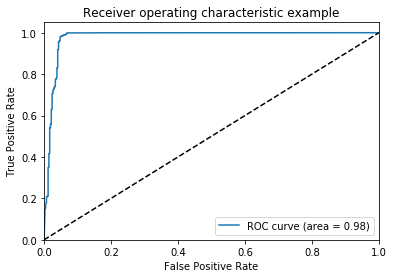

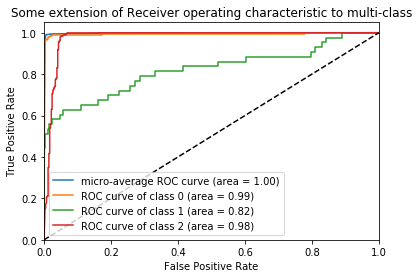

In [14]:
#code from https://scikit-learn.org/0.15/auto_examples/plot_roc.html

from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
#from itertools import cycle

y_score = best_mlp.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(Y_test.ravel())
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="best")
plt.show()